https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# Connect G-Drive

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import os
myDirFiles = "/content/drive/MyDrive/DiSkola/w8-project3"
os.chdir(myDirFiles)

In [20]:
!ls

 assets			'Insurance Recommendation'
 data			'[Sandbox] Kaggle House Price.ipynb'
 data_description.docx	'w8-project3 House_Price_Prediction_Batch_13.ipynb'


# I.1 General Exploration

In [59]:
#Load libraries
import pandas as pd #DataFrame
import matplotlib.pyplot as plt #Vizualition
import seaborn as sns #Viz
import numpy as np #array processing
import warnings 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn #LR, Lasso Reg, Rifge re, Random forest, dll

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler #Data Scaling
from sklearn.feature_selection import VarianceThreshold #memilih kolom yg penting saja
from scipy import stats
from scipy.stats import chi2 #detect codependency of Independent Variable
from sklearn.impute import SimpleImputer #missing value treatment
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")


In [60]:
# Load Train set
df_train = pd.read_csv("assets/train.csv")
print(f"Train set shape:\n{df_train.shape}\n")

# Load Test set
df_test = pd.read_csv("assets/test.csv")
print(f"Test set shape:\n{df_test.shape}")

Train set shape:
(1460, 81)

Test set shape:
(1459, 80)


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [62]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [64]:
dif_1 = []
for col in df_train.columns:
  if col not in df_test.columns:
    dif_1.append(col)

dif_2 = []
for col in df_test.columns:
  if col not in df_train.columns:
    dif_2.append(col)

print(f'Columns present in df_train and absent in df_test: {dif_1}\n')
print(f'Columns present in df_test and absent in df_train: {dif_2}\n')

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test and absent in df_train: []



In [65]:
# Drop the 'Id' column the train set
df_train.drop(['Id'], axis = 1, inplace = True)

# Save the list of 'Id' before dropping it from the test set
id_test_list = df_test['Id'].tolist()
df_test.drop(['Id'], axis = 1, inplace = True)

#I.2 Numerical Features

##I.2.1 Explore and clean Numerical features

In [66]:
df_train_num = df_train.select_dtypes(exclude = ['object'])
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [67]:
# Let's drop quasi-constant features where 95% of the values are similar constant
# sel : selector

sel = VarianceThreshold(threshold=0.05) #0.05 = drop column where 95% of the values are constant

In [68]:
# fit find the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])

VarianceThreshold(threshold=0.05)

In [69]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [70]:
# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")
print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

Number of retained features: 35

Number of quasi_constant features: 1


In [71]:
df_train_num.iloc[:, :-1].columns[sel.get_support()]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [72]:
df_train_num.iloc[:, :-1].columns[~sel.get_support()]

Index(['KitchenAbvGr'], dtype='object')

In [73]:
df_train_num['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [74]:
quasi_constant_features_list = df_train_num.iloc[:, :-1].columns[~sel.get_support()].tolist()
print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


Quasi-constant features to be dropped: ['KitchenAbvGr']


In [75]:
# Let's drop these columns from df_train_num
df_train_num.drop(
    quasi_constant_features_list, 
    axis=1, 
    inplace=True
)

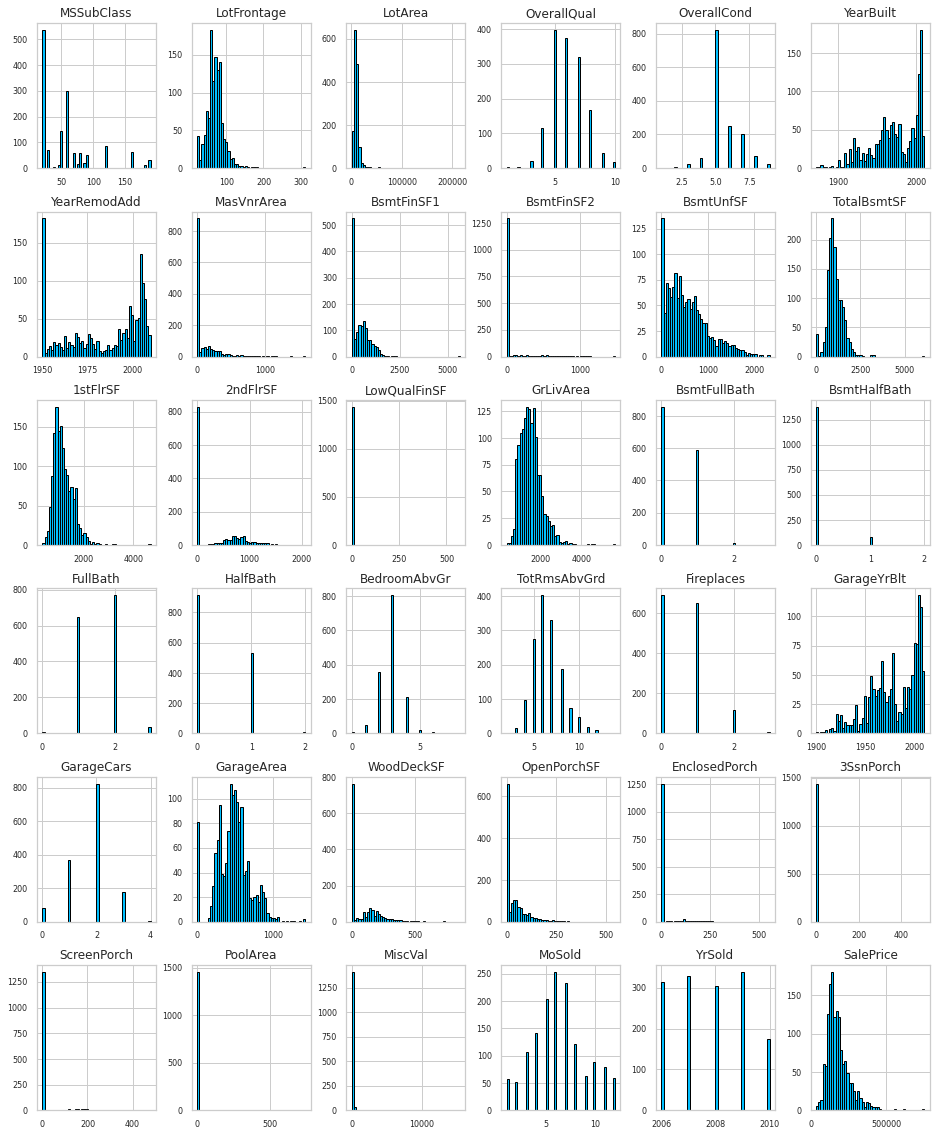

In [76]:
# Plot the distribution of all the numerical data
fig_ = df_train_num.hist(
    figsize=(16, 20), 
    bins=50, 
    color="deepskyblue", 
    edgecolor="black", 
    xlabelsize=8, 
    ylabelsize=8
)

In [77]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = '{:,.2f}'.format

In [78]:
corr_matrix = df_train_num.corr()
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,...,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,...,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,...,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,...,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,...,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,...,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,...,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,...,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
BsmtFinSF1,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,...,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39
BsmtFinSF2,-0.07,0.05,0.11,-0.06,0.04,-0.05,-0.07,-0.07,-0.05,1.00,...,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,-0.02,0.03,-0.01


In [79]:
#Replace correlation < |0.3| by 0 for a better visibility

corr_mask = (corr_matrix < 0.3 ) & (corr_matrix > -0.3)
corr_matrix[corr_mask] = 0
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
LotFrontage,-0.39,1.00,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.35
LotArea,0.00,0.43,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OverallQual,0.00,0.00,0.00,1.00,0.00,0.57,0.55,0.41,0.00,0.00,...,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.79
OverallCond,0.00,0.00,0.00,0.00,1.00,-0.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
YearBuilt,0.00,0.00,0.00,0.57,-0.38,1.00,0.59,0.32,0.00,0.00,...,0.00,0.00,-0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.52
YearRemodAdd,0.00,0.00,0.00,0.55,0.00,0.59,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.51
MasVnrArea,0.00,0.00,0.00,0.41,0.00,0.32,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.48
BsmtFinSF1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39
BsmtFinSF2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [80]:
# Mask the upper part of the heatmap

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

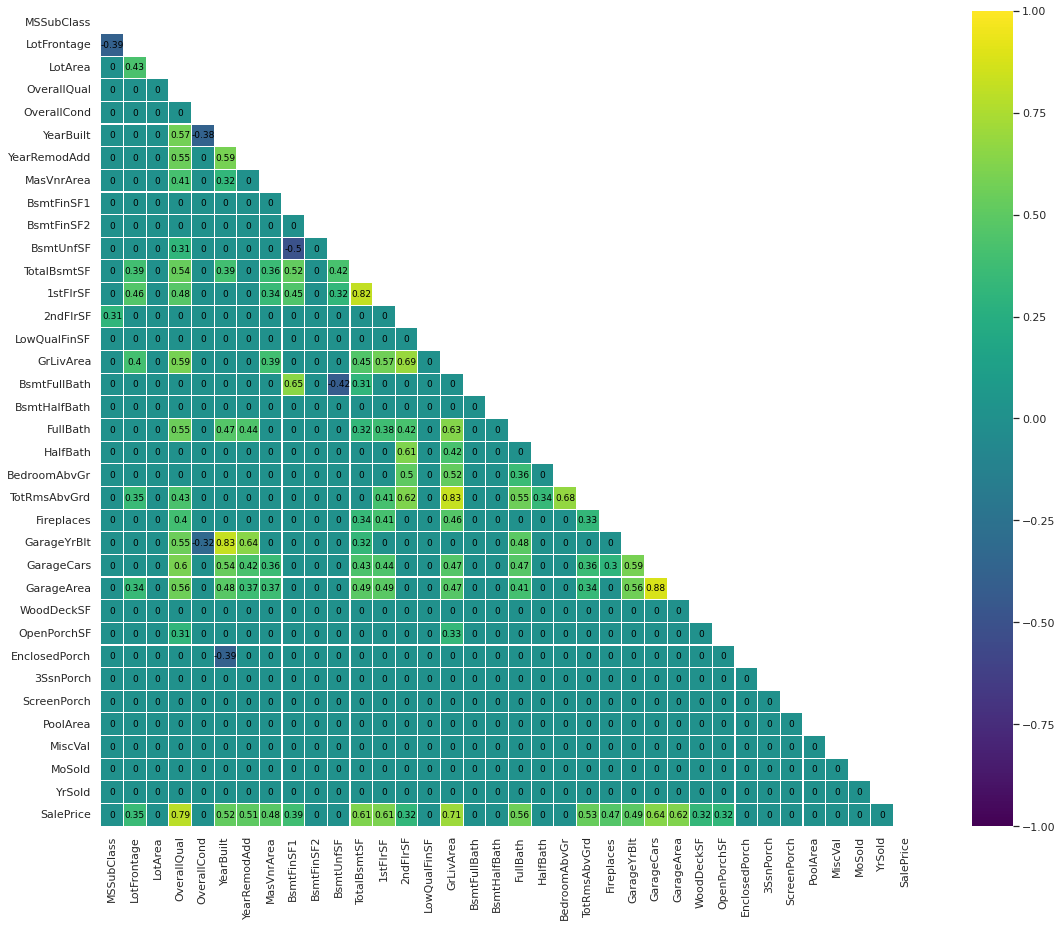

In [81]:
# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap( 
    data = corr_matrix, 
    mask = mask, # cover, not showing them which masked True
    vmax = 1.0, 
    vmin = -1.0, 
    linewidths = 0.1,
    annot_kws = {
        "size": 9, 
        "color": "black"
    }, 
    square = True, 
    cmap = cmap, 
    annot = True
);

In [82]:
# Let's select features where the correlation with 'SalePrice' is higher than |0.3|
# -1 because the latest row is SalePrice
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = df_num_corr[abs(df_num_corr) >= 0.5].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
low_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(low_features_list)} slightly correlated values with SalePrice:\n{low_features_list}")

10 strongly correlated values with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

8 slightly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


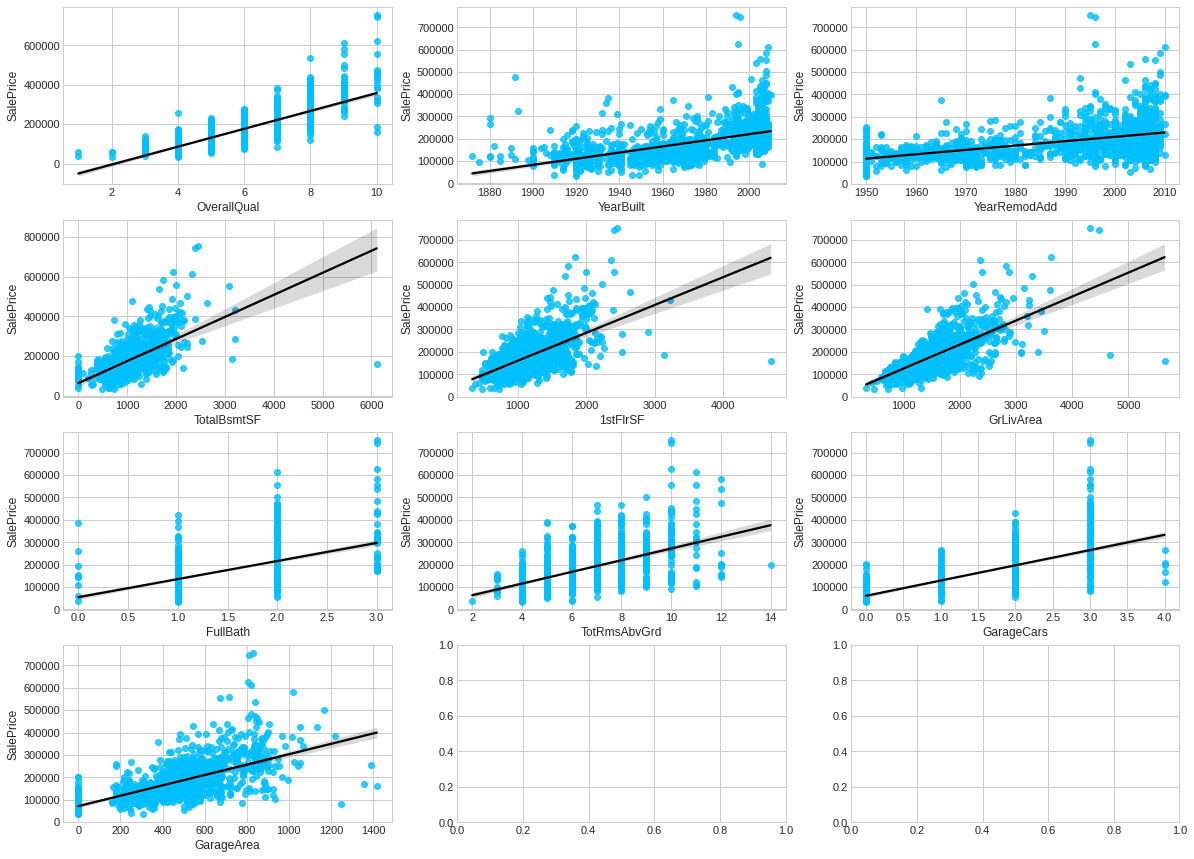

In [83]:
# Features with high correlation (higher than 0.5)
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(
            x=strong_features[i], 
            y="SalePrice", 
            data=df_strong_features, 
            ax=ax, 
            scatter_kws= {"color": "deepskyblue"}, 
            line_kws={"color": "black"}
        )

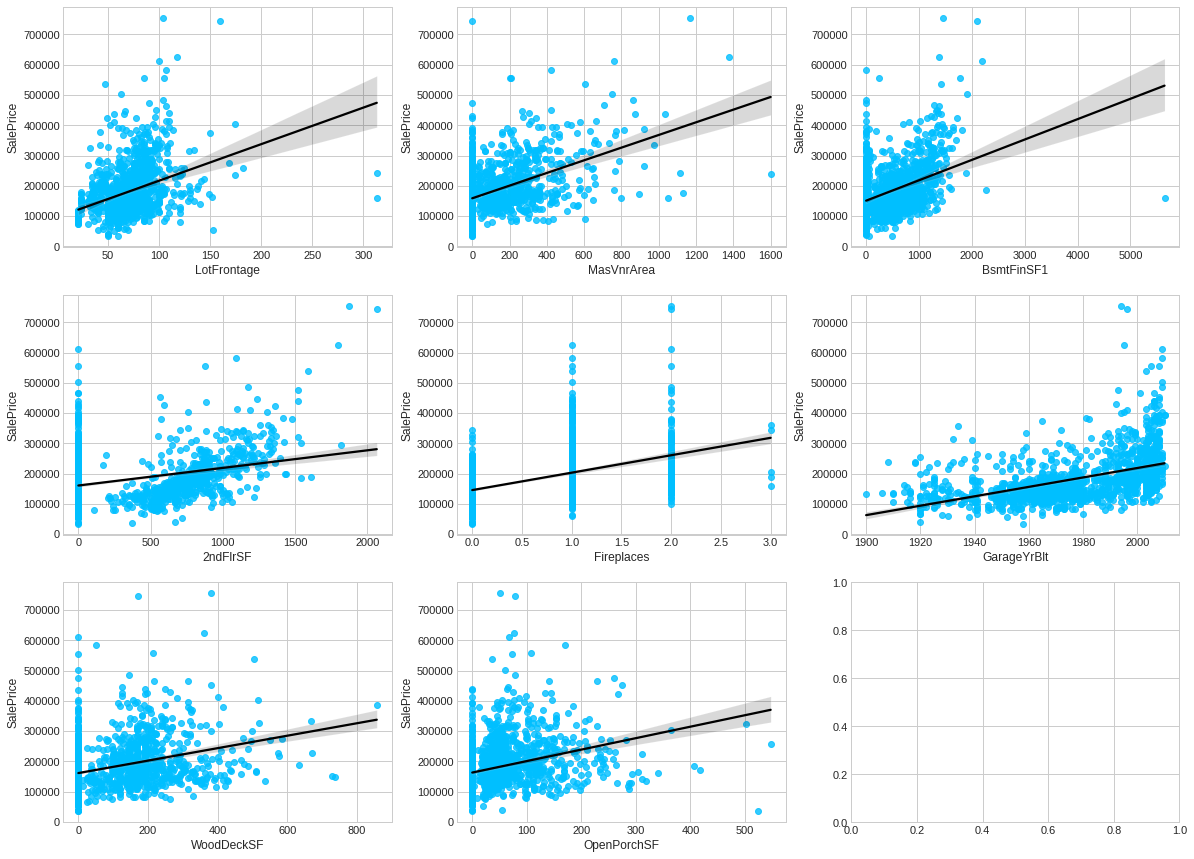

In [84]:
# Features with low correlation (between 0.3 and 0.5)
low_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (abs(df_num_corr) < 0.5)].index.tolist()
low_features.append("SalePrice")

df_low_features = df_train_num.loc[:, low_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(low_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(low_features) - 1:
        sns.regplot(
            x=low_features[i], 
            y="SalePrice", 
            data=df_low_features, 
            ax=ax, 
            scatter_kws={"color": "deepskyblue"}, 
            line_kws={"color": "black"}
        )

In [85]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + low_features

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

In [86]:
list_of_numerical_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'Fireplaces',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

## I.2.2 Missing data of Numerical features

Train Set

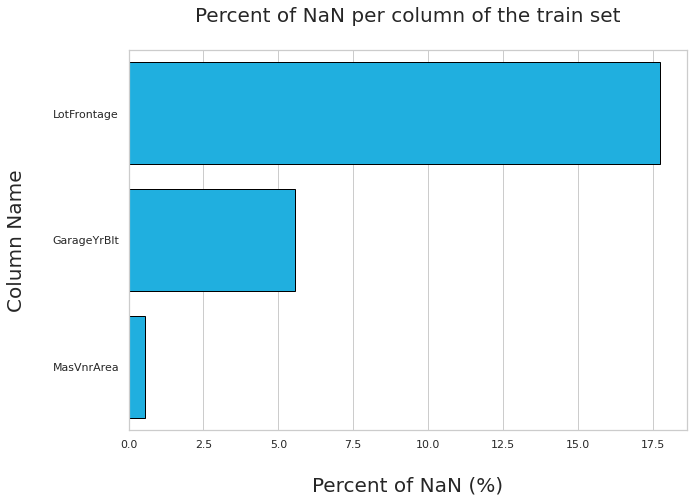

In [87]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20);

In [88]:
# Imputation of missing values (NaNs) with SimpleImputer

my_imputer = SimpleImputer(strategy="median")
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,65.00,196.00,706.00,854.00,0.00,"2,003.00",0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,80.00,0.00,978.00,0.00,1.00,"1,976.00",298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,68.00,162.00,486.00,866.00,1.00,"2,001.00",0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,60.00,0.00,216.00,756.00,1.00,"1,998.00",0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,84.00,350.00,655.00,"1,053.00",1.00,"2,000.00",192.00,84.00,"250,000.00"


In [89]:
df_train_imputed.columns = df_train_num.columns
df_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,LotFrontage,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF,SalePrice
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,65.00,196.00,706.00,854.00,0.00,"2,003.00",0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,80.00,0.00,978.00,0.00,1.00,"1,976.00",298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,68.00,162.00,486.00,866.00,1.00,"2,001.00",0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,60.00,0.00,216.00,756.00,1.00,"1,998.00",0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,84.00,350.00,655.00,"1,053.00",1.00,"2,000.00",192.00,84.00,"250,000.00"


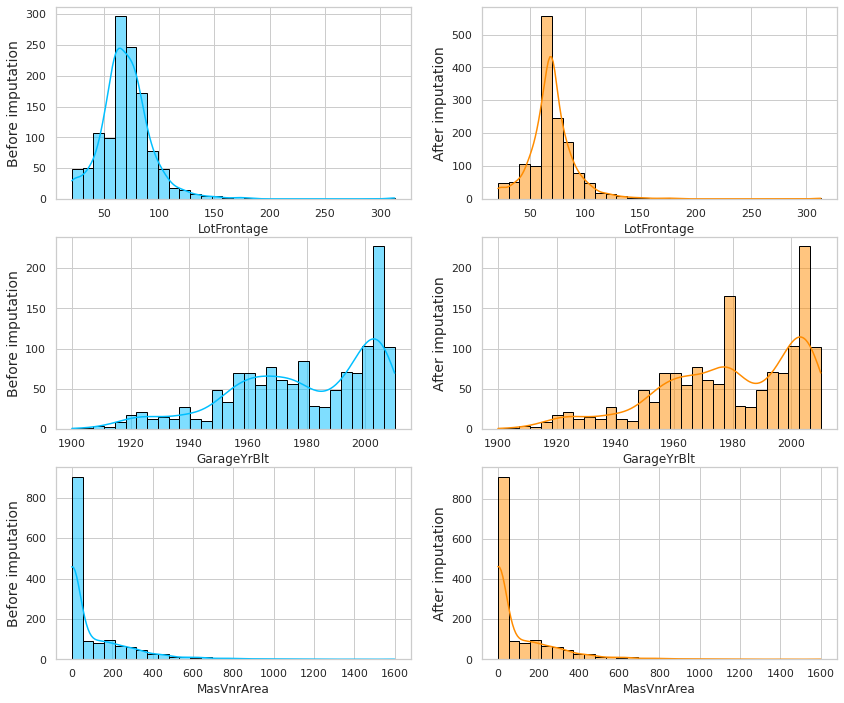

In [90]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

In [91]:
# Drop 'LotFrontage' and 'GarageYrBlt'
df_train_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
df_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,196.00,706.00,854.00,0.00,0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,0.00,978.00,0.00,1.00,298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,162.00,486.00,866.00,1.00,0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,0.00,216.00,756.00,1.00,0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,350.00,655.00,"1,053.00",1.00,192.00,84.00,"250,000.00"


Test Set

In [92]:
# Drop the same features from test set as for the train set
df_test_num.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)

Text(0, 0.5, 'Column Name\n')

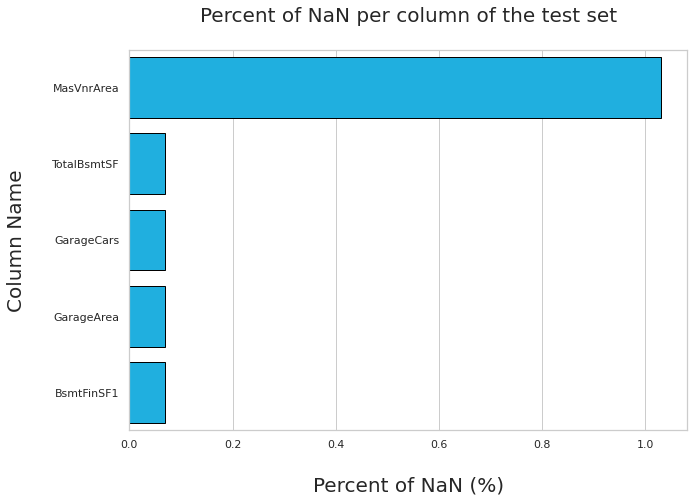

In [93]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [94]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

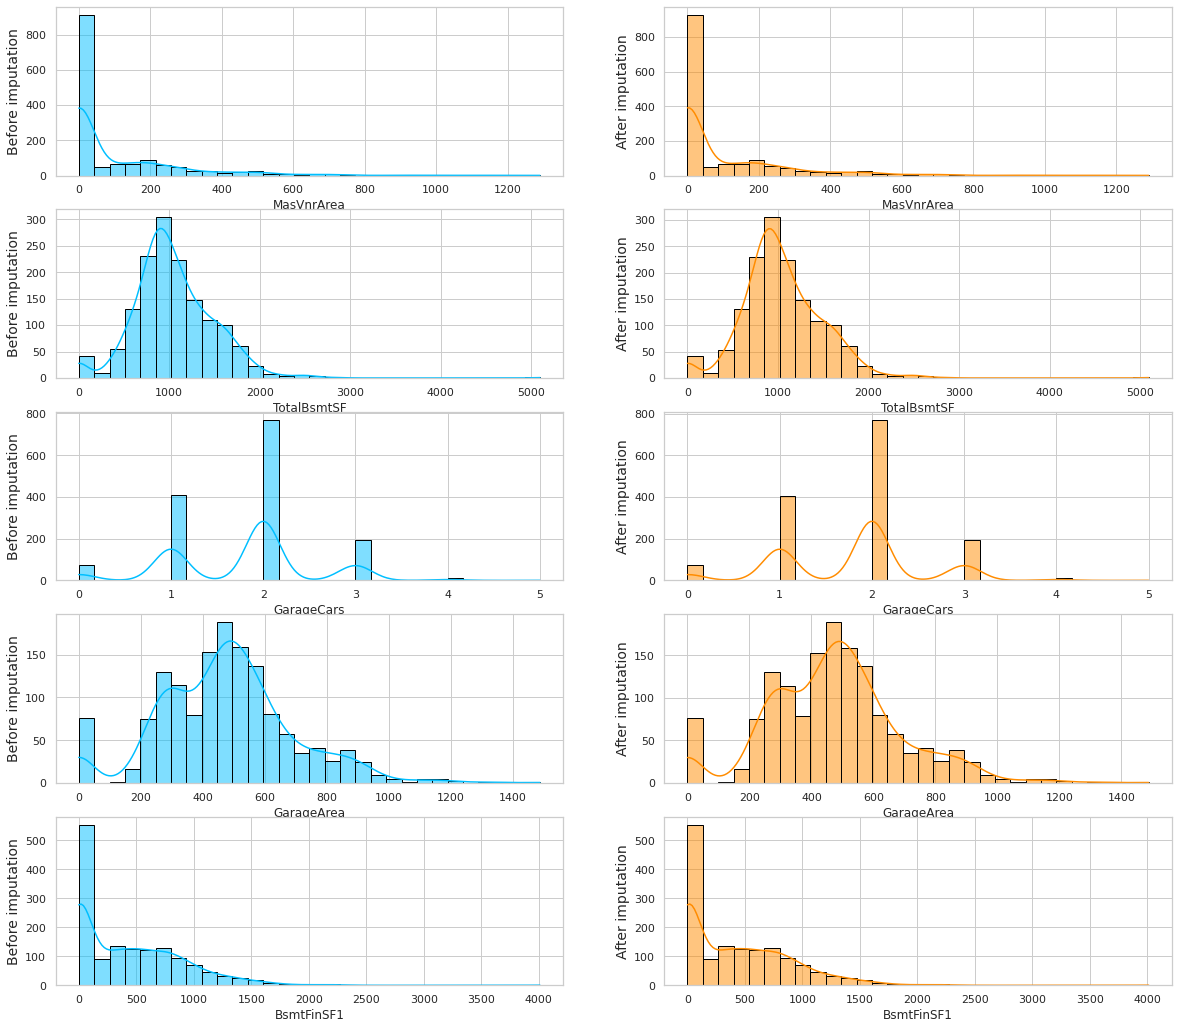

In [95]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

# I.3 Categorical features

## I.3.1. Explore and clean Categorical features

In [96]:
# Categorical to Quantitative relationship

# categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"] # -->list comprehension

# for-loop 
categorical_features = []
for feat, feat_type in zip(df_train.columns, df_train.dtypes):
    if feat_type == 'object':
       categorical_features.append(feat)

# Include target variable
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

df_test_categ.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


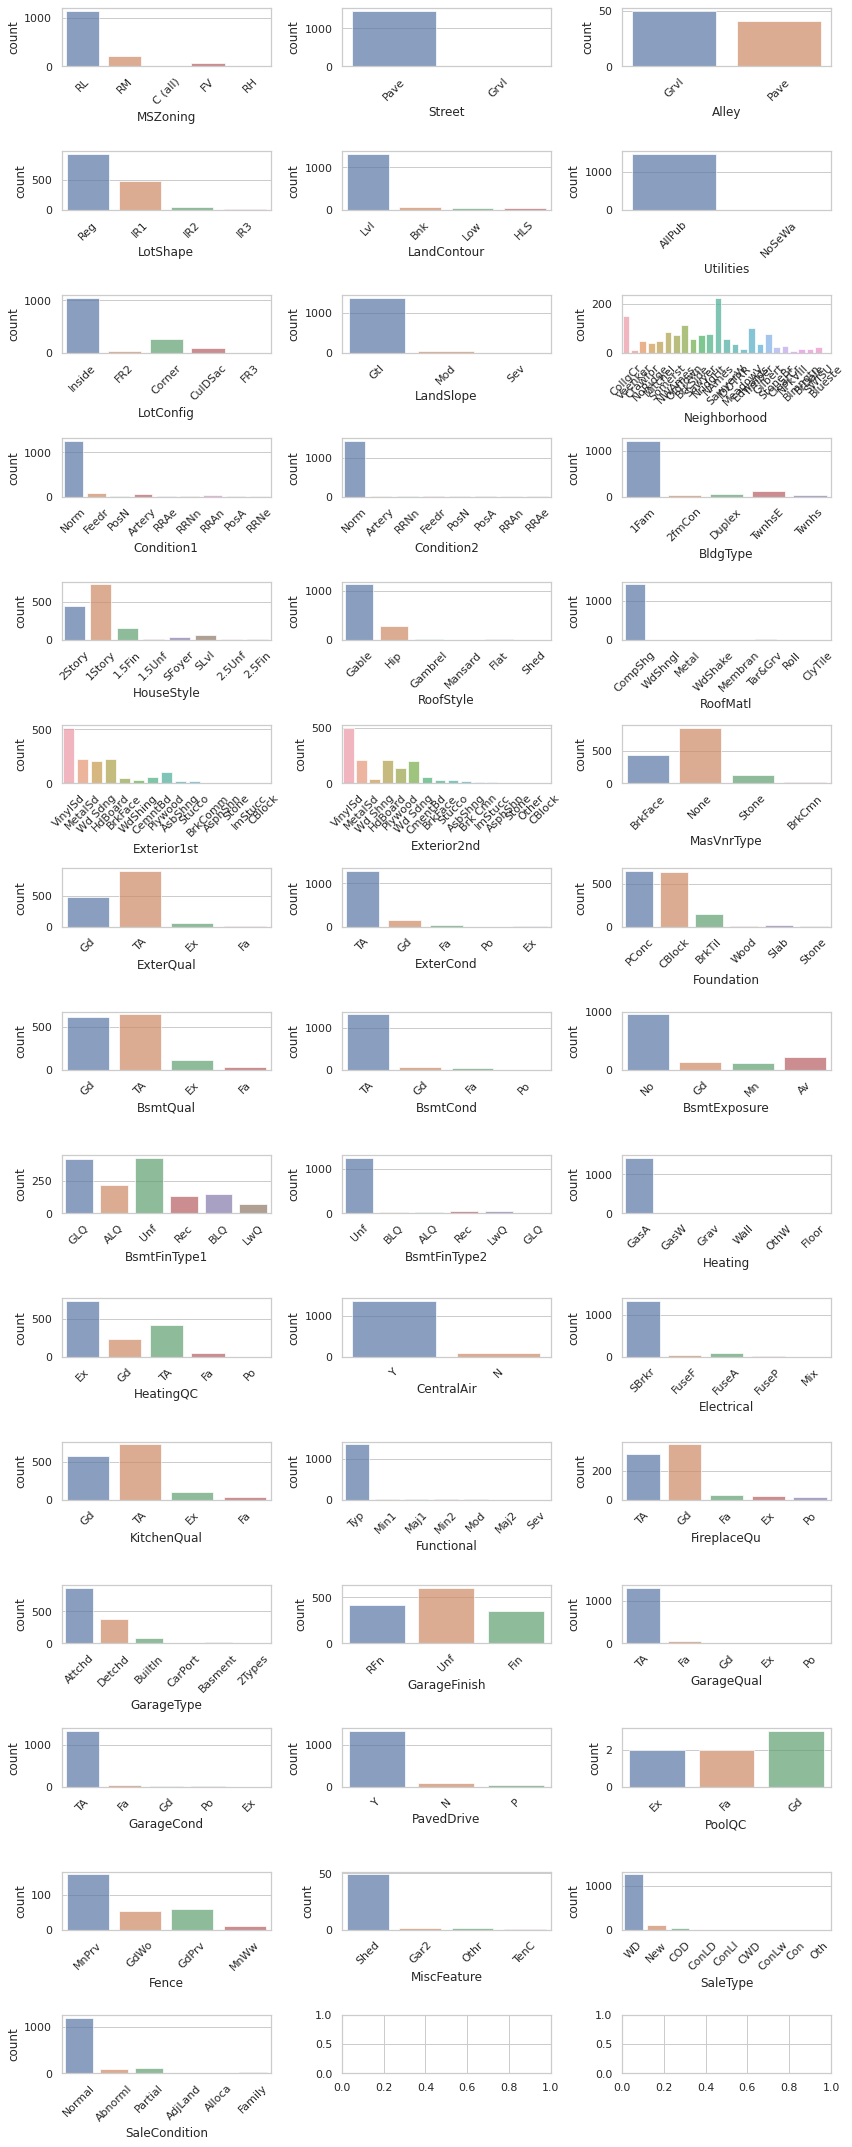

In [97]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    round(len(df_train_categ.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax)

fig.tight_layout()

In [98]:
# Drop some categorical 'non-informative' features from train set
columns_to_drop = ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 
                   'CentralAir', 'BsmtFinType2', 'Heating', 'Functional','GarageQual', 'GarageCond', 
                   'ExterCond','MiscFeature', 'PavedDrive', 'SaleType']

In [99]:
# Train set
df_train_categ.drop(columns_to_drop, axis=1, inplace=True)

# Test set
df_test_categ.drop(columns_to_drop, axis=1, inplace=True)

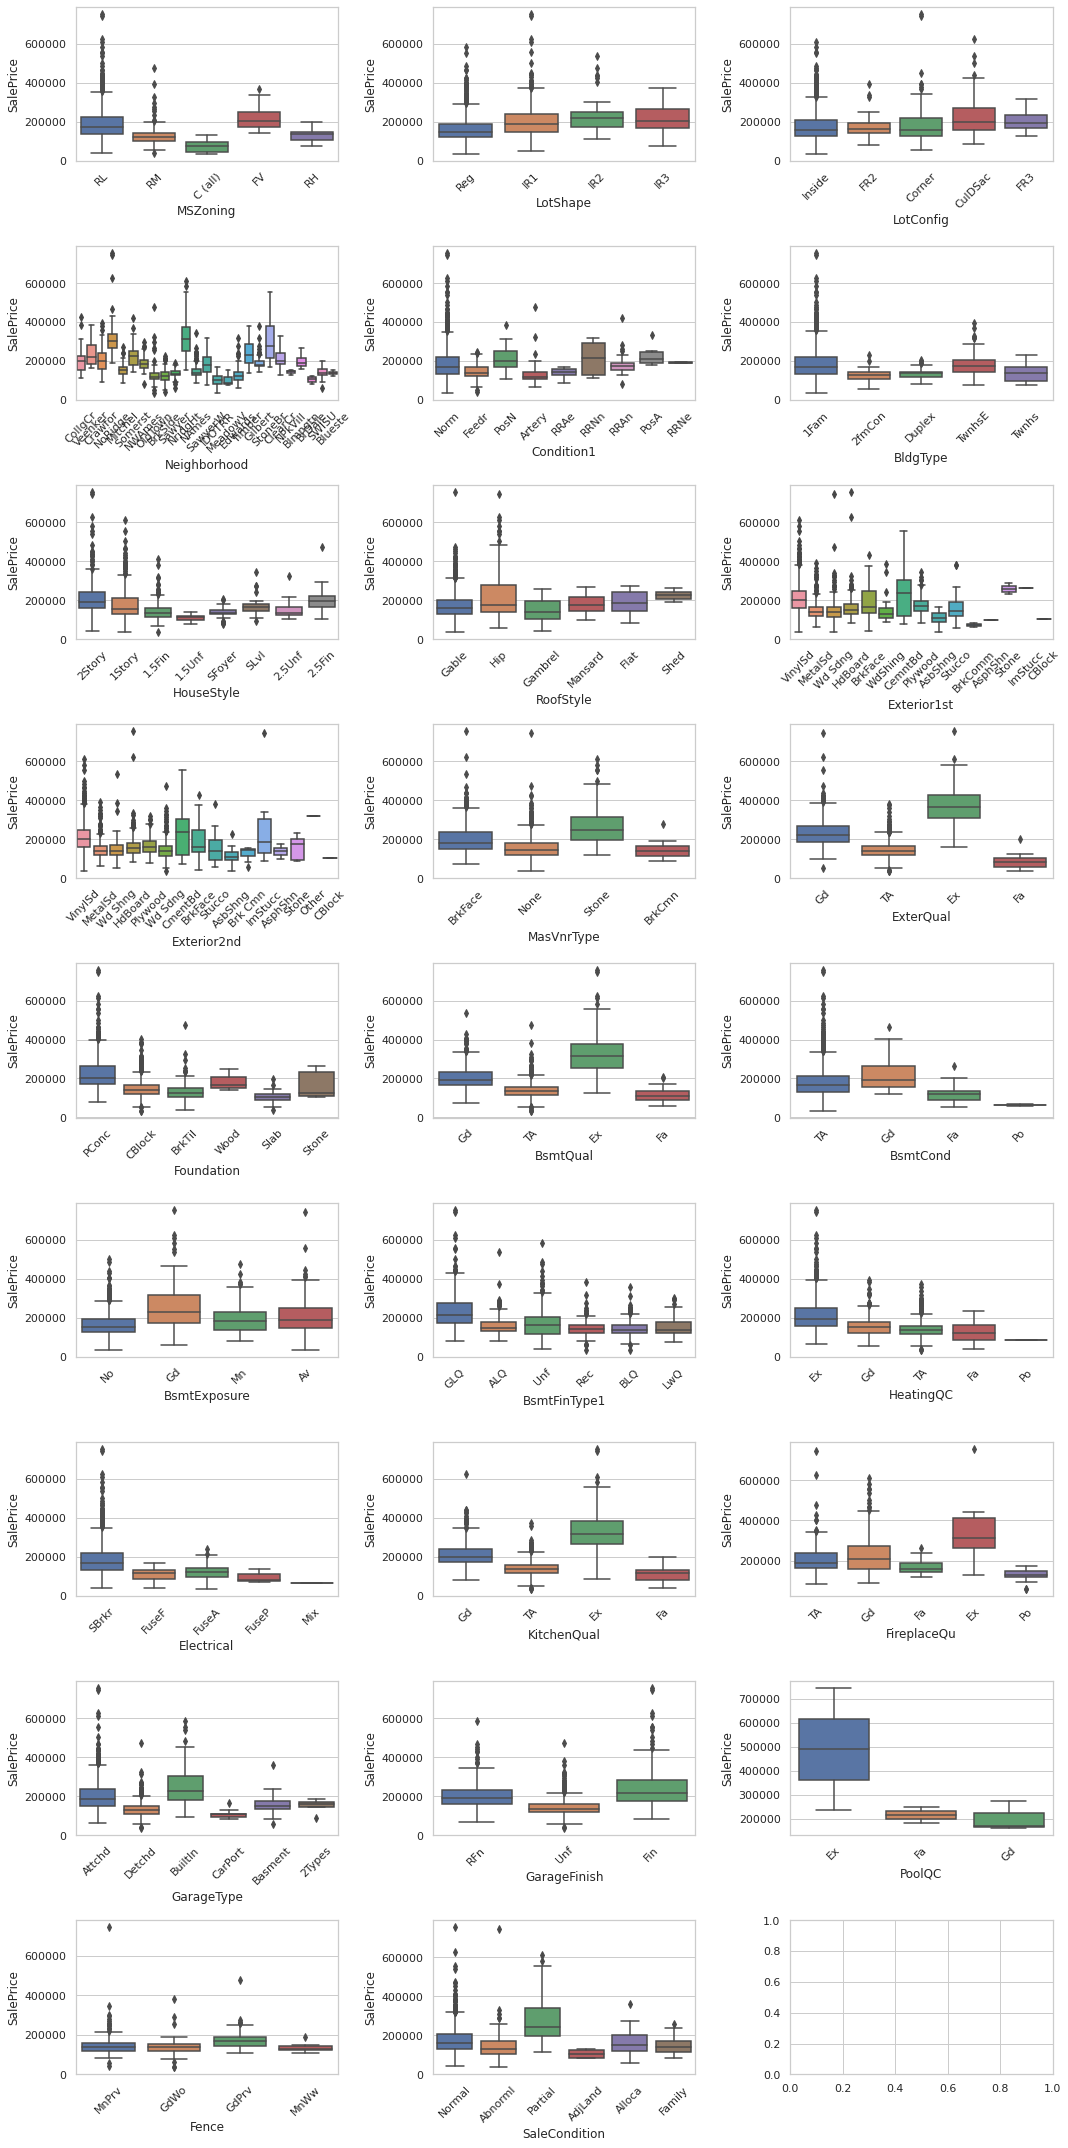

In [100]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(
            x=df_train_categ.columns[i], y="SalePrice", data=df_train_categ, ax=ax)

fig.tight_layout()

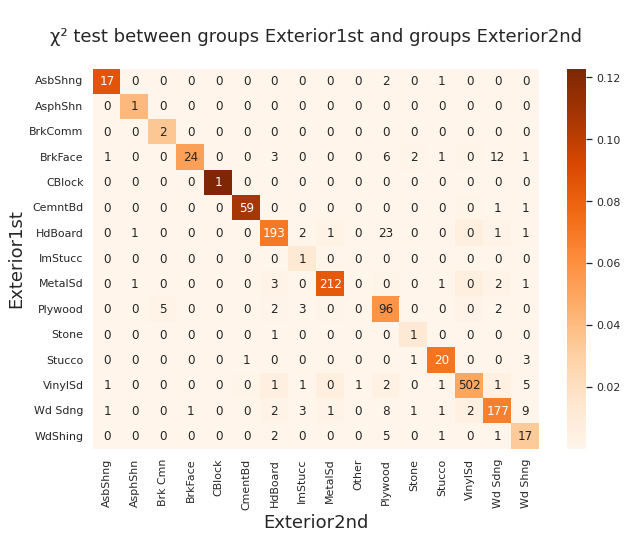

NameError: ignored

In [102]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual", "BsmtQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtCond", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test (menguji kecocokan)
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

In [103]:
# Let's drop the one of each co-dependent variables
# Train set
df_train_categ.drop(Y, axis=1, inplace=True)

# Test set
df_test_categ.drop(Y, axis=1, inplace=True)

## I.3.2 Missing data of Categorical features

Train Set

In [104]:
# Drop the same features from test set as for the train set
df_test_categ.drop(["PoolQC", "Fence", "FireplaceQu",
                    "GarageType", "GarageFinish"], axis=1, inplace=True,)

Text(0, 0.5, 'Column Name\n')

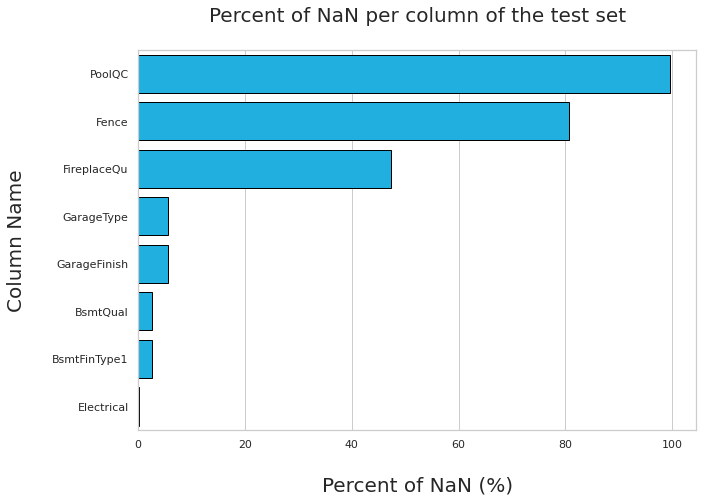

In [105]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [106]:
# Drop the features where the percentage of NaN is higher than 5%
df_train_categ.drop(["PoolQC", "Fence", "FireplaceQu", "GarageType", "GarageFinish"], 
                    axis=1, inplace=True)

In [107]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0],
                   "Electrical": df_train_categ["Electrical"].mode().iloc[0]}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)

## I.3.3. Transform Categorical features into Binary features (get_dummies)

In [108]:
# Train set
for i in df_train_categ.columns.tolist()[:-1]:
    df_dummies = pd.get_dummies(df_train_categ[i], prefix=i)

    # merge both tables
    df_train_categ = df_train_categ.join(df_dummies)

# Select the binary features only
df_train_binary = df_train_categ.iloc[:, 18:]
df_train_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [109]:
# Test set
for i in df_test_categ.columns.tolist():
    df_dummies = pd.get_dummies(df_test_categ[i], prefix=i)

    # merge both tables
    df_test_categ = df_test_categ.join(df_dummies)

# Select the binary features only
df_test_binary = df_test_categ.iloc[:, 17:]
df_test_binary.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [110]:
# Let's check if the column headings are the same in both data set, df_train and df_test
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(
    f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(
    f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Electrical_Mix']

Features present in df_test_categ set and absent in df_train_categ: []


In [111]:
# Let's drop these columns from df_train_binary
df_train_binary.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data set
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(
    f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(
    f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


# I.4. Merge numerical and binary features into one data set

In [112]:
# Add binary features to numreical features
# Train set
df_train_new = df_train_imputed.join(df_train_binary)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = df_test_imputed.join(df_test_binary)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 135)
Test set: (1459, 134)


#I.5 Drop outliers from the tain set

In [113]:
# Drop "WoodDeckSF" and "OpenPorchSF" --> See Numerical Feature Viz
df_train_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)
df_test_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)

In [114]:
# Let's handle the outliers in "GrLivArea", "TotalBsmtSF" and "GarageArea"
# Outliers in "GrLivArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 3000) & (
    df_train_new["SalePrice"] <= 400000)].index.tolist()

# Outliers in "GarageArea"
outliers3 = df_train_new[(df_train_new["GarageArea"] > 1200) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

[1061, 581, 1190, 523, 332, 1298]


# II. Feature engineering

In [115]:
# Define a function to calculate the occupancy rate of the first floor of the total living area


def floor_occupation(x):
    """First floor occupation of the total live area

    floor_occupation equation has the following form:
    (1st Floor Area * 100) / (Ground Live Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Ground Live Area = 0
        equation -- if Ground Live Area > 0
    """
    if x["GrLivArea"] == 0:
        return 0
    else:
        return x["1stFlrSF"] * 100 / x["GrLivArea"]


# Apply the function on train and test set
df_train_new["1stFlrPercent"] = df_train_new.apply(
    lambda x: floor_occupation(x), axis=1)

df_test_new["1stFlrPercent"] = df_test_new.apply(
    lambda x: floor_occupation(x), axis=1)

# Drop "1stFlrSF" and "2ndFlrSF"
df_train_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)
df_test_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

In [116]:
# Define a function to calculate the occupancy rate of the finished basement area


def bsmt_finish(x):
    """Propotion of finished area in basement 

    bsmt_finish equation has the following form:
    (Finished Basement Area * 100) / (Total Basement Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Total Basement Area = 0
        equation -- if Total Basement Area > 0
    """
    if x["TotalBsmtSF"] == 0:
        return 0
    else:
        return x["BsmtFinSF1"] * 100 / x["TotalBsmtSF"]


# Apply the function on train and test set
df_train_new["BsmtFinPercent"] = df_train_new.apply(
    lambda x: bsmt_finish(x), axis=1)

df_test_new["BsmtFinPercent"] = df_test_new.apply(
    lambda x: bsmt_finish(x), axis=1)

# Drop "BsmtFinSF1"
df_train_new.drop(["BsmtFinSF1"], axis=1, inplace=True)
df_test_new.drop(["BsmtFinSF1"], axis=1, inplace=True)

In [117]:
# Convert Year of construction to Age of the house since the construction
df_train_new["AgeSinceConst"] = df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"]

df_test_new["AgeSinceConst"] = df_test_new["YearBuilt"].max() - df_test_new["YearBuilt"]

# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [118]:
df_train_new["AgeSinceRemod"] = df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"]

df_test_new["AgeSinceRemod"] = df_test_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"]

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [119]:
continuous_features = ["OverallQual", "TotalBsmtSF", "GrLivArea",
                       "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea",
                       "MasVnrArea", "Fireplaces", "1stFlrPercent",
                       "BsmtFinPercent", "AgeSinceConst", "AgeSinceRemod"]
df_skew_verify = df_train_new.loc[:, continuous_features]

In [120]:
# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features,
                          "Abs_Skew": skew_ft})

sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['GrLivArea', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces', 'AgeSinceConst', 'AgeSinceRemod']


In [121]:
# Log transformation of the skewed features
#sf_features = ["TotalBsmtSF", "GrLivArea", "MasVnrArea", "GarageArea"]

for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Train set
    df_train_new[i] = np.log((df_train_new[i])+1)
    
    # Test set
    df_test_new[i] = np.log((df_test_new[i])+1)

# III. Preparing data for modeling

##III.1 Target variable 'SalePrice'

Text(0, 0.5, '')

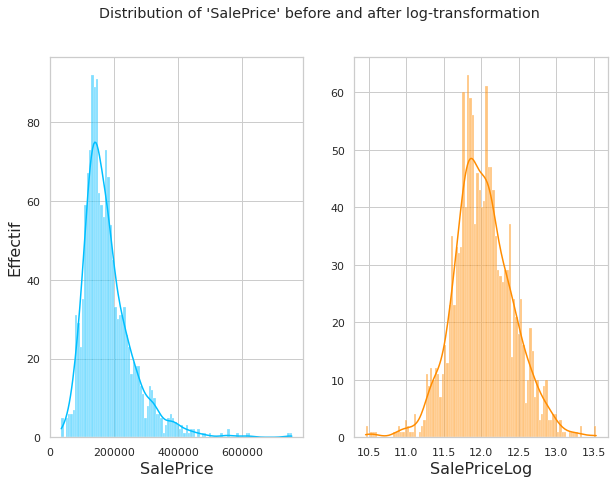

In [122]:
# Log transformation of the target variable "SalePrice"
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'SalePrice' before and after log-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=df_train_new["SalePrice"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("Effectif", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=df_train_new["SalePriceLog"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("SalePriceLog", fontsize=16)
q.set_ylabel("", fontsize=16)

In [123]:
# Drop the original SalePrice
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

##III.2. Split data into train and test set and Standardization

In [124]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "SalePriceLog"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1454, 131)
(1454,)


In [125]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1163, 131)
y_train:(1163,)

X_test:(291, 131)
y_test:(291,)


In [126]:
# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
# The same standardization is applied for df_test_new
df_test_new = std_scale.transform(df_test_new)


# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

##III.3. Backward Stepwise Regression

In [127]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : Foundation_PConc, 0.9849521846351867 
worst_feature : Neighborhood_BrkSide, 0.9838526475117011 
worst_feature : Neighborhood_Gilbert, 0.99884504322334 
worst_feature : Condition1_RRNe, 0.9660624816366394 
worst_feature : Condition1_PosN, 0.9922098844214036 
worst_feature : ExterQual_Ex, 0.9498575638502411 
worst_feature : HouseStyle_SLvl, 0.9202219175406805 
worst_feature : HouseStyle_1.5Unf, 0.95957952927692 
worst_feature : Exterior1st_WdShing, 0.9050152006545295 
worst_feature : RoofStyle_Hip, 0.887663993319098 
worst_feature : TotRmsAbvGrd, 0.8816837903101761 
worst_feature : MSZoning_RH, 0.881225821806371 
worst_feature : MSZoning_RL, 0.9430205594397327 
worst_feature : BsmtFinType1_BLQ, 0.8515947998712046 
worst_feature : Neighborhood_NPkVill, 0.8335112685033232 
worst_feature : Neighborhood_Blueste, 0.827721514893922 
worst_feature : HeatingQC_Gd, 0.8009193317195272 
worst_feature : Exterior1st_CBlock, 0.8004293064111412 
worst_feature : ExterQual_TA, 0.753096873

In [128]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
df_test_new = df_test_new.loc[:, Selected_Features[0]]

##III.4. Variance Inflation Factor

In [129]:
# Here I calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,3.60,OverallQual
1,1.80,TotalBsmtSF
2,2.20,GrLivArea
3,5.60,GarageCars
4,5.10,GarageArea
5,1.60,Fireplaces
6,1.10,MSZoning_C (all)
7,2.00,MSZoning_RM
8,1.10,LotShape_IR2
9,1.10,LotConfig_CulDSac


In [131]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

None of the features have a high multicollinearity


In [132]:
# Drop features with high multicollinearity from X_train, X_test and df_test_new
X_train.drop(high_vif_list, axis=1, inplace=True)

X_test.drop(high_vif_list, axis=1, inplace=True)

df_test_new.drop(high_vif_list, axis=1, inplace=True)

##III.5. Cook distance

In [133]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

,Cook_Distance,p_value
0,0.00,1.00
1,0.00,1.00
2,0.00,1.00
3,0.00,1.00
4,0.00,1.00


In [134]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: [477]


#IV. Modeling

##IV.1. Models and metrics selection

In [135]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [136]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [137]:
# Define regression models
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [ridge, lasso, elastic, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: Ridge
R²: 0.9190470115626883
RMSE: 0.1168835076719448

- Regressor: Lasso
R²: 0.9192904047571089
RMSE: 0.11670766446661143

- Regressor: ElasticNet
R²: 0.9192107821885027
RMSE: 0.11676521817674103

- Regressor: RandomForestRegressor
R²: 0.8957949485684845
RMSE: 0.13261149758814553

[08:24:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBRegressor
R²: 0.9118775704498128
RMSE: 0.12194950015170743

- Regressor: LGBMRegressor
R²: 0.9045645575197595
RMSE: 0.12690877123252065



##IV.2. Hyperparameters tuning and model optimization

##IV.2.1. Ridge regression

In [138]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 33.9322177189533}
Best R² (train): 0.8995152373740367


In [139]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.9188643193486573
RMSE: 0.11701532289699264


In [140]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

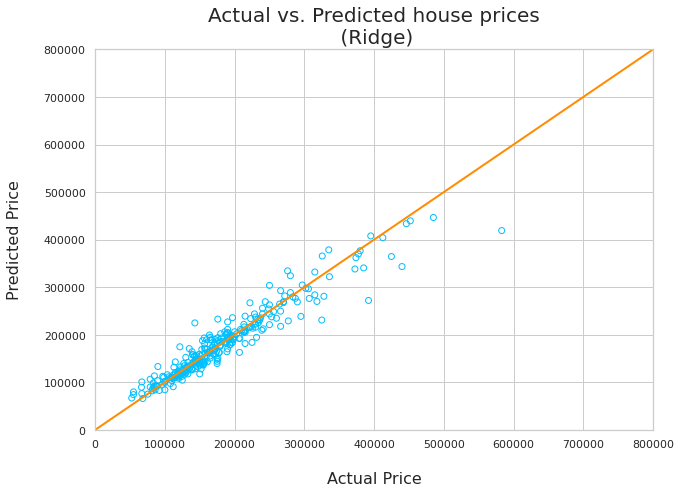

In [141]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

##IV.2.2. Lasso regression

In [142]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 1e-05}
Best R² (train): 0.8991887863846142


In [143]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the model on train set
lasso_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])


- Lasso
R²: 0.9190519431251803
RMSE: 0.11687994741362412
- Lasso
R²: 0.9190519431251803
RMSE: 0.11687994741362412


In [144]:
# Save the model results into lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

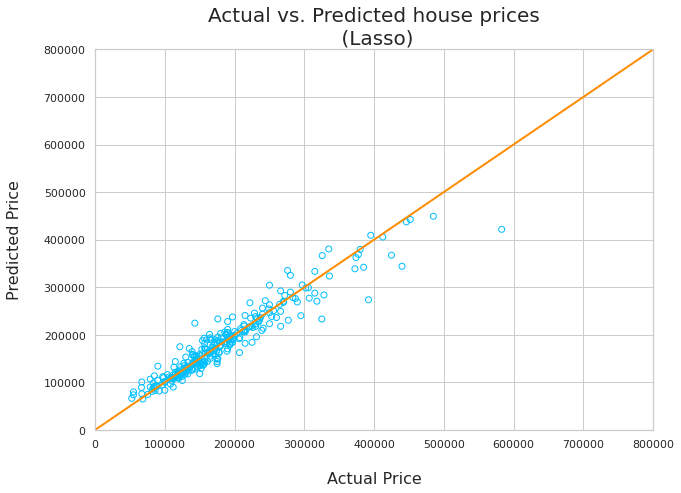

In [145]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

##IV.2.3. XGBoost regression

In [146]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[08:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.8846186484487332


In [147]:
# XGB Regressor with the best hyperparameters
xgbr_mod = XGBRegressor(seed=20,
                        colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
                        learning_rate=xgbr_cv.best_params_["learning_rate"],
                        max_depth=xgbr_cv.best_params_["max_depth"],
                        n_estimators=xgbr_cv.best_params_["n_estimators"])

# Fit the model on train set
xgbr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = xgbr_mod.predict(X_test)

print(f"- {xgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

[08:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- XGBRegressor
R²: 0.9176559173930912
RMSE: 0.11788349171085721


In [148]:
# Save the model results into lists
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

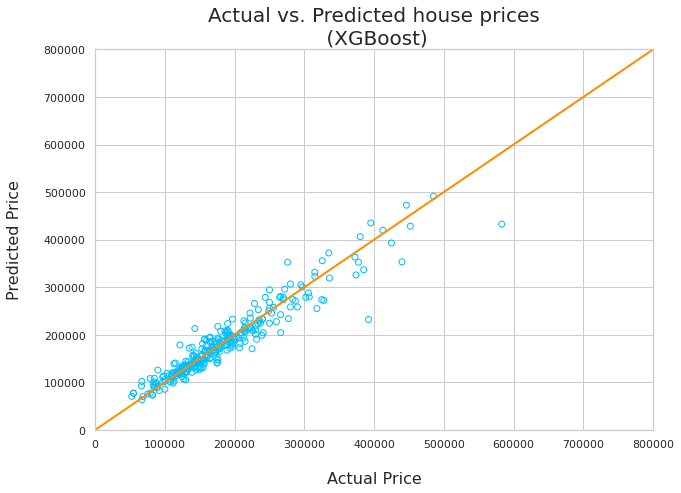

In [149]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

##IV.2.4. LightGBM regression

In [151]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3, 6, 10], "learning_rate": [
    0.01, 0.05, 0.1], "n_estimators": [100, 500, 1000], }

# GridSearch
lgbm_cv = GridSearchCV(estimator=LGBMRegressor(
), param_grid=tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lgbm_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lgbm_cv.best_params_}\n")
print(f"Best R²: {lgbm_cv.best_score_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.8775404445274612


In [152]:
# LGBM Regressor with the best hyperparameters
lgbm_mod = LGBMRegressor(learning_rate=lgbm_cv.best_params_["learning_rate"],
                         max_depth=lgbm_cv.best_params_["max_depth"],
                         n_estimators=lgbm_cv.best_params_["n_estimators"])

# Fit the model on train set
lgbm_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm_mod.predict(X_test)

print(f"- {lgbm_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- LGBMRegressor
R²: 0.9129364944902023
RMSE: 0.1212145820080148


In [153]:
# Save the model results into lists
model_list.append(lgbm_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

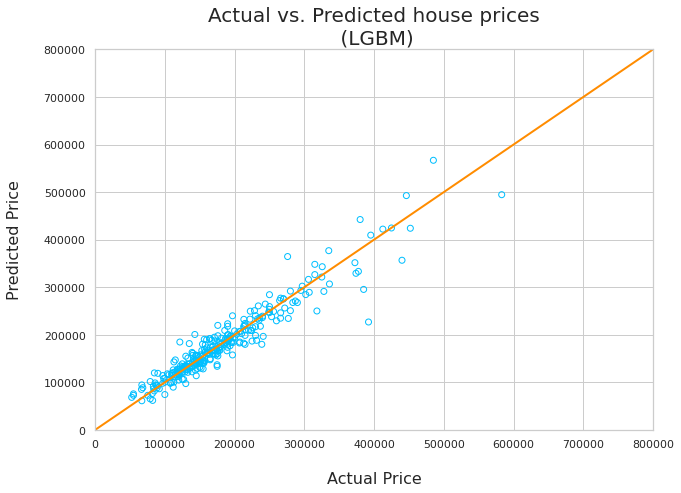

In [154]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (LGBM)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

##IV.3. Choosing the best model

In [155]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

,Model,R²,RMSE
0,Ridge,0.92,0.12
1,Lasso,0.92,0.12
2,XGBRegressor,0.92,0.12
3,LGBMRegressor,0.91,0.12


## IV.4. Prediction on 'House Prices-Advanced Regression Techniques' test data set

In [158]:
# Predictions from Ridge model
predictions_list = xgbr_mod.predict(df_test_new)

# Conversion of logarithmic predictions to logical data Sale Price
saleprice_preds = np.exp(predictions_list)

# DataFrame of test ID and their corresponding predictions
output = pd.DataFrame({"Id": id_test_list,
                       "SalePrice": saleprice_preds})
output.head(10)

,Id,SalePrice
0,1461,"121,399.20"
1,1462,"153,813.00"
2,1463,"180,431.69"
3,1464,"187,850.39"
4,1465,"185,885.27"
5,1466,"171,615.52"
6,1467,"169,467.23"
7,1468,"168,823.77"
8,1469,"197,128.16"
9,1470,"124,594.71"
